# Deep Earthquakes at Axial Seamount
Research Computing: Final Project\
Michelle Lee

### Research Question
Are there deep earthquakes associated with the 2015 Axial Seamount Eruption and are these deep earthquakes located at the depths and locations of the magma sills imaged beneath the main magma reservoir?

### Motivation
For this project, we define deep earthquakes at Axial Seamount as earthquakes located beneath the main axial melt lens (AML), which is located at around 1.5km below the seafloor. At other volcanic systems, deep earthquakes associated with eruptions of the volcano have been detected and located beneath the main magma reservoir. These deep earthquakes are typically located where magma sills have been imaged beneath the main AML and have been correlated with the magma transport between the sills. For this project, we want to determine if the ocean bottom seismometers(OBS) at the seamount were able to detect deep earthquakes at Axial Seamount during the time of the 2015 eruptions. Then for these deep earthquakes, we want to compare their depths and locations with the location the main AML to see if any are located below it. Our main goal is to determine if the deep earthquakes from eruptions at Axial Seamount can tell us about the magma transport during the 2015 eruption.

In [1]:
# Importing Packages
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import os.path
from os import path
from matplotlib.dates import DateFormatter, date2num
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 

## Loading the datafiles

### Loading earthquake catalog

In [2]:
# Load Eq Catalog Data
eqfile = 'Axial-DD.v201701.1'
headers = ('year','month','day','hour','minute','second','Lat','Lon','Dep','EH1','EH2','AZ','EZ','Mag','ID')   
data = pd.read_csv(eqfile, sep='\s+',skiprows=71, header=None, names=headers,index_col='ID')
data['Date'] = pd.to_datetime(data[['year','month','day','hour','minute','second']])
eq_catalog = data.drop(['year','month','day','hour','minute','second'], axis=1)
eq_catalog

,Lat,Lon,Dep,EH1,EH2,AZ,EZ,Mag,Date
ID,,,,,,,,,
20831,45.98251,-129.99355,2.596,0.095,0.046,27,0.104,0.0,2015-01-22 00:08:58.441
20836,45.94219,-130.01480,0.686,0.050,0.007,99,0.011,-0.0,2015-01-22 02:02:41.013
20837,45.91576,-129.96290,2.903,-1.000,-1.000,-1,-1.000,0.3,2015-01-22 02:19:56.825
20840,45.95987,-129.99159,1.860,0.087,0.014,28,0.036,-0.1,2015-01-22 02:36:06.964
20841,45.94755,-129.99418,1.264,0.021,0.008,9,0.044,0.1,2015-01-22 02:39:20.678
...,...,...,...,...,...,...,...,...,...
171472,45.92501,-129.98680,0.935,0.033,0.011,179,0.042,0.0,2017-01-31 13:30:43.213
171473,45.94380,-129.99746,0.388,0.019,0.009,33,0.011,-0.1,2017-01-31 22:47:57.096
171475,45.94356,-129.98513,1.195,0.023,0.011,83,0.035,-0.1,2017-02-01 10:49:55.935


In [3]:
eq_catalog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96706 entries, 20831 to 171510
Data columns (total 9 columns):
Lat     96706 non-null float64
Lon     96706 non-null float64
Dep     96706 non-null float64
EH1     96706 non-null float64
EH2     96706 non-null float64
AZ      96706 non-null int64
EZ      96706 non-null float64
Mag     96706 non-null float64
Date    96706 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 7.4 MB


In [4]:
# selecting subset of data before and after the 2015 eruption that occurred on April 24
Mar2May15Eq=eq_catalog[(eq_catalog.Date >= '2015-03-01') & (eq_catalog.Date <= '2015-06-01')]
Mar2May15Eq

,Lat,Lon,Dep,EH1,EH2,AZ,EZ,Mag,Date
ID,,,,,,,,,
51792,45.95050,-129.97436,0.068,0.635,0.038,149,0.279,-0.5,2015-03-01 00:01:00.028
51793,45.95991,-129.99379,1.631,0.065,0.012,19,0.021,0.1,2015-03-01 00:01:45.998
51794,45.93611,-129.97715,1.486,0.020,0.009,97,0.014,-0.2,2015-03-01 00:04:32.752
51795,45.95909,-129.99485,0.917,0.214,0.010,10,0.040,-0.1,2015-03-01 00:04:39.221
51797,45.96472,-129.99632,1.675,0.056,0.020,30,0.045,-0.2,2015-03-01 00:07:32.120
...,...,...,...,...,...,...,...,...,...
166395,45.94771,-129.98728,2.422,0.023,0.017,57,0.028,0.2,2015-05-31 11:31:40.545
166397,45.94404,-129.98188,1.704,0.043,0.014,75,0.030,-0.2,2015-05-31 13:07:53.916
166401,45.94381,-129.98166,1.593,0.021,0.012,85,0.024,-0.0,2015-05-31 15:06:33.253


In [5]:
# Determine ID of first and last event in subselection
Mar2May15Eq[:1]

,Lat,Lon,Dep,EH1,EH2,AZ,EZ,Mag,Date
ID,,,,,,,,,
51792,45.9505,-129.97436,0.068,0.635,0.038,149,0.279,-0.5,2015-03-01 00:01:00.028


In [6]:
Mar2May15Eq[-1:]

,Lat,Lon,Dep,EH1,EH2,AZ,EZ,Mag,Date
ID,,,,,,,,,
166404,45.94309,-129.98475,1.294,0.02,0.007,81,0.023,0.1,2015-05-31 22:48:22.054


### Loading phase file to determine velocity model accuracy 

In [7]:
data = []
file = open('Axial-DD.phases.truncate.1')
for i in file:
    if i[0] == "#":
        temp = (i.rsplit())
        ind = int(temp[-1])
    else: 
        if (ind <= 166404):
            split = (i.rsplit())
            # station, time, weight, phase, ID
            data.append([split[0], float(split[1]), float(split[2]), split[3], ind])
        else:
            break 
            
phase = pd.DataFrame(data, columns=('Stations','Time','Weight','Phase','ID'))
phase = phase.set_index('ID')

In [8]:
phase

,Stations,Time,Weight,Phase
ID,,,,
51792,OOAXEC,0.141,0.50,P
51792,OOAXEC,0.436,0.25,P
51792,OOAXEC,0.621,0.25,P
51792,OOAXID,0.841,0.37,P
51792,OOAXCC,0.766,0.00,S
...,...,...,...,...
166404,OOAXEC,0.819,0.33,S
166404,OOAXEC,0.839,0.25,S
166404,OOAXEC,0.869,0.33,S


### Loading Lat/Lon of Axial Main Magma Reservoir

In [9]:
MMR_file = 'Axial_Seamount_MMR.ll'
headers = ('Lon','Lat')   
MMR = pd.read_csv(MMR_file, sep='\s+', header=None, names=headers)
MMR

,Lon,Lat
0,-130.032539,46.016246
1,-130.032601,46.016126
2,-130.032663,46.016006
3,-130.032725,46.015887
4,-130.032787,46.015767
...,...,...
3234,-129.943741,45.884890
3235,-129.943803,45.884771
3236,-129.943865,45.884651
3237,-129.944044,45.884493


## Plotting Data

![OBS_Station_Location](https://ocean.pangeo.io/user/0000-0002-4169-7049/files/RC_Final_Project/OBS_Station_Locations.png?_xsrf=2%7C9067c149%7C0183faafdefadf55411b510d66dad02a%7C1573496896)
Figure Adapted from: Felix Waldhauser, 2019 (https://www.ldeo.columbia.edu/~felixw/Axial/)

In [10]:
# plotting S-P for station OOAXAS (station closest to region in caldera of MMR)
gb = phase.groupby('Stations')
OOAXAS_events = gb.get_group('OOAXAS')
gb2 = OOAXAS_events.groupby('Phase')
Pphases = gb2.get_group('P')
Sphases = gb2.get_group('S')

In [11]:
Pphases

,Stations,Time,Weight,Phase
ID,,,,
51793,OOAXAS,0.824,0.25,P
51794,OOAXAS,0.592,0.75,P
51797,OOAXAS,1.014,0.00,P
51805,OOAXAS,0.682,0.25,P
51810,OOAXAS,0.918,0.50,P
...,...,...,...,...
166401,OOAXAS,0.734,0.37,P
166402,OOAXAS,0.591,1.00,P
166402,OOAXAS,0.756,0.25,P


In [12]:
Sphases

,Stations,Time,Weight,Phase
ID,,,,
51794,OOAXAS,1.237,0.08,S
51805,OOAXAS,1.582,0.17,S
51810,OOAXAS,1.833,0.08,S
51810,OOAXAS,1.468,0.25,S
51811,OOAXAS,1.057,0.25,S
...,...,...,...,...
166397,OOAXAS,0.859,0.01,S
166401,OOAXAS,1.139,0.08,S
166402,OOAXAS,1.121,0.25,S


In [13]:
Pavg = Pphases.groupby('ID').mean()
Pavg

,Time,Weight
ID,,
51793,0.8240,0.250
51794,0.5920,0.750
51797,1.0140,0.000
51805,0.6820,0.250
51810,0.8930,0.500
...,...,...
166395,0.7655,0.750
166397,0.6140,0.500
166401,0.6790,0.685


In [14]:
Savg = Sphases.groupby('ID').mean()
Savg

,Time,Weight
ID,,
51794,1.2370,0.080
51805,1.5820,0.170
51810,1.6505,0.165
51811,1.0570,0.250
51812,1.1100,0.120
...,...,...
166395,1.4705,0.125
166397,0.8590,0.010
166401,1.1390,0.080


In [15]:
sminusp = Savg.Time - Pavg.Time
sminusp

ID
51793        NaN
51794     0.6450
51797        NaN
51805     0.9000
51810     0.7575
           ...  
166395    0.7050
166397    0.2450
166401    0.4600
166402    0.4475
166404    0.5150
Name: Time, Length: 66798, dtype: float64

In [16]:
sminusp_clean = sminusp.dropna()
sminusp_clean

ID
51794     0.6450
51805     0.9000
51810     0.7575
51811     0.6100
51812     0.4350
           ...  
166395    0.7050
166397    0.2450
166401    0.4600
166402    0.4475
166404    0.5150
Name: Time, Length: 55577, dtype: float64

In [17]:
combined = eq_catalog.join(sminusp_clean, how='right')
combined

,Lat,Lon,Dep,EH1,EH2,AZ,EZ,Mag,Date,Time
ID,,,,,,,,,,
51794,45.93611,-129.97715,1.486,0.020,0.009,97.0,0.014,-0.2,2015-03-01 00:04:32.752,0.6450
51805,45.96273,-129.99568,1.737,0.067,0.016,25.0,0.031,0.4,2015-03-01 00:19:32.371,0.9000
51810,45.96247,-129.99735,1.587,0.073,0.014,16.0,0.027,0.5,2015-03-01 00:24:20.209,0.7575
51811,45.93006,-129.98516,0.498,0.008,0.006,176.0,0.009,-0.3,2015-03-01 00:24:35.669,0.6100
51812,45.94475,-129.98520,1.537,0.021,0.011,79.0,0.027,-0.3,2015-03-01 00:24:50.123,0.4350
...,...,...,...,...,...,...,...,...,...,...
166395,45.94771,-129.98728,2.422,0.023,0.017,57.0,0.028,0.2,2015-05-31 11:31:40.545,0.7050
166397,45.94404,-129.98188,1.704,0.043,0.014,75.0,0.030,-0.2,2015-05-31 13:07:53.916,0.2450
166401,45.94381,-129.98166,1.593,0.021,0.012,85.0,0.024,-0.0,2015-05-31 15:06:33.253,0.4600


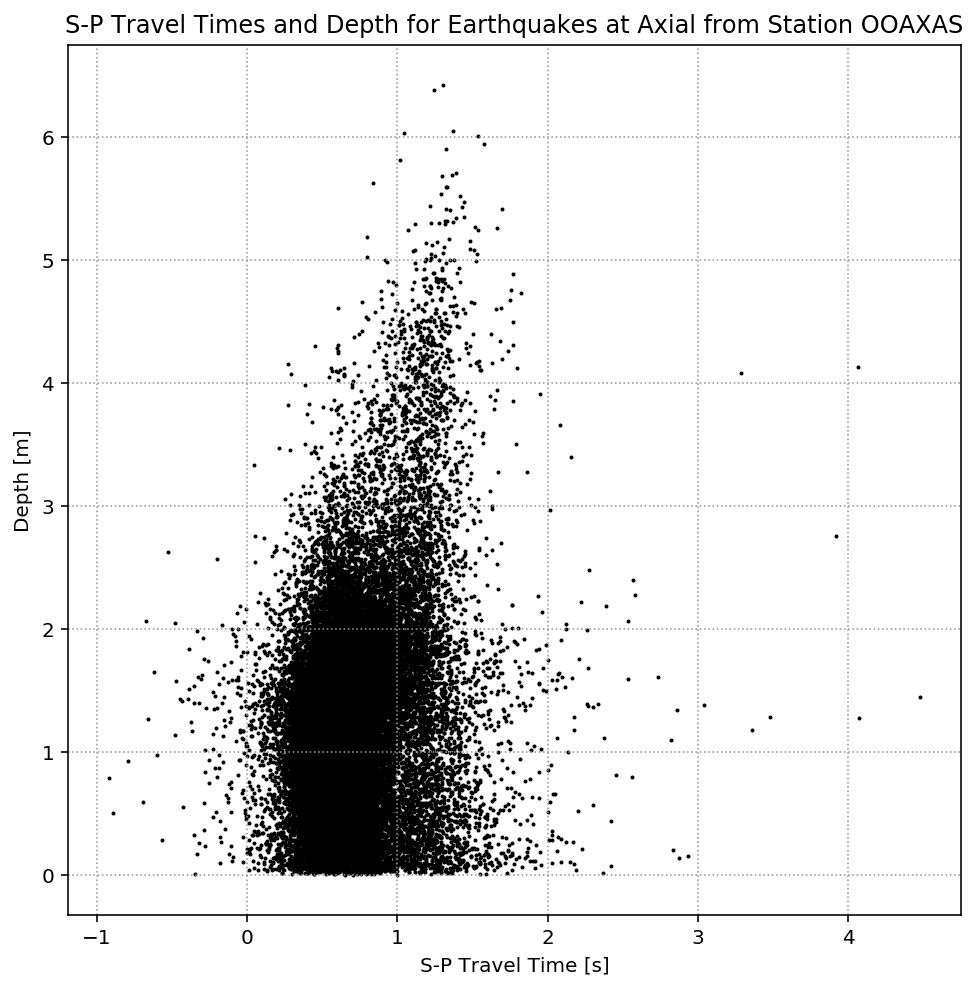

In [18]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(combined.Time, combined.Dep, s=1, c='k')
ax.set_title('S-P Travel Times and Depth for Earthquakes at Axial from Station OOAXAS')
ax.set_xlabel('S-P Travel Time [s]')
ax.set_ylabel('Depth [m]')
ax.grid(which='major', linestyle=':', color='0.6')

## Save the Figure
#fig.savefig('SPDepth.pdf')

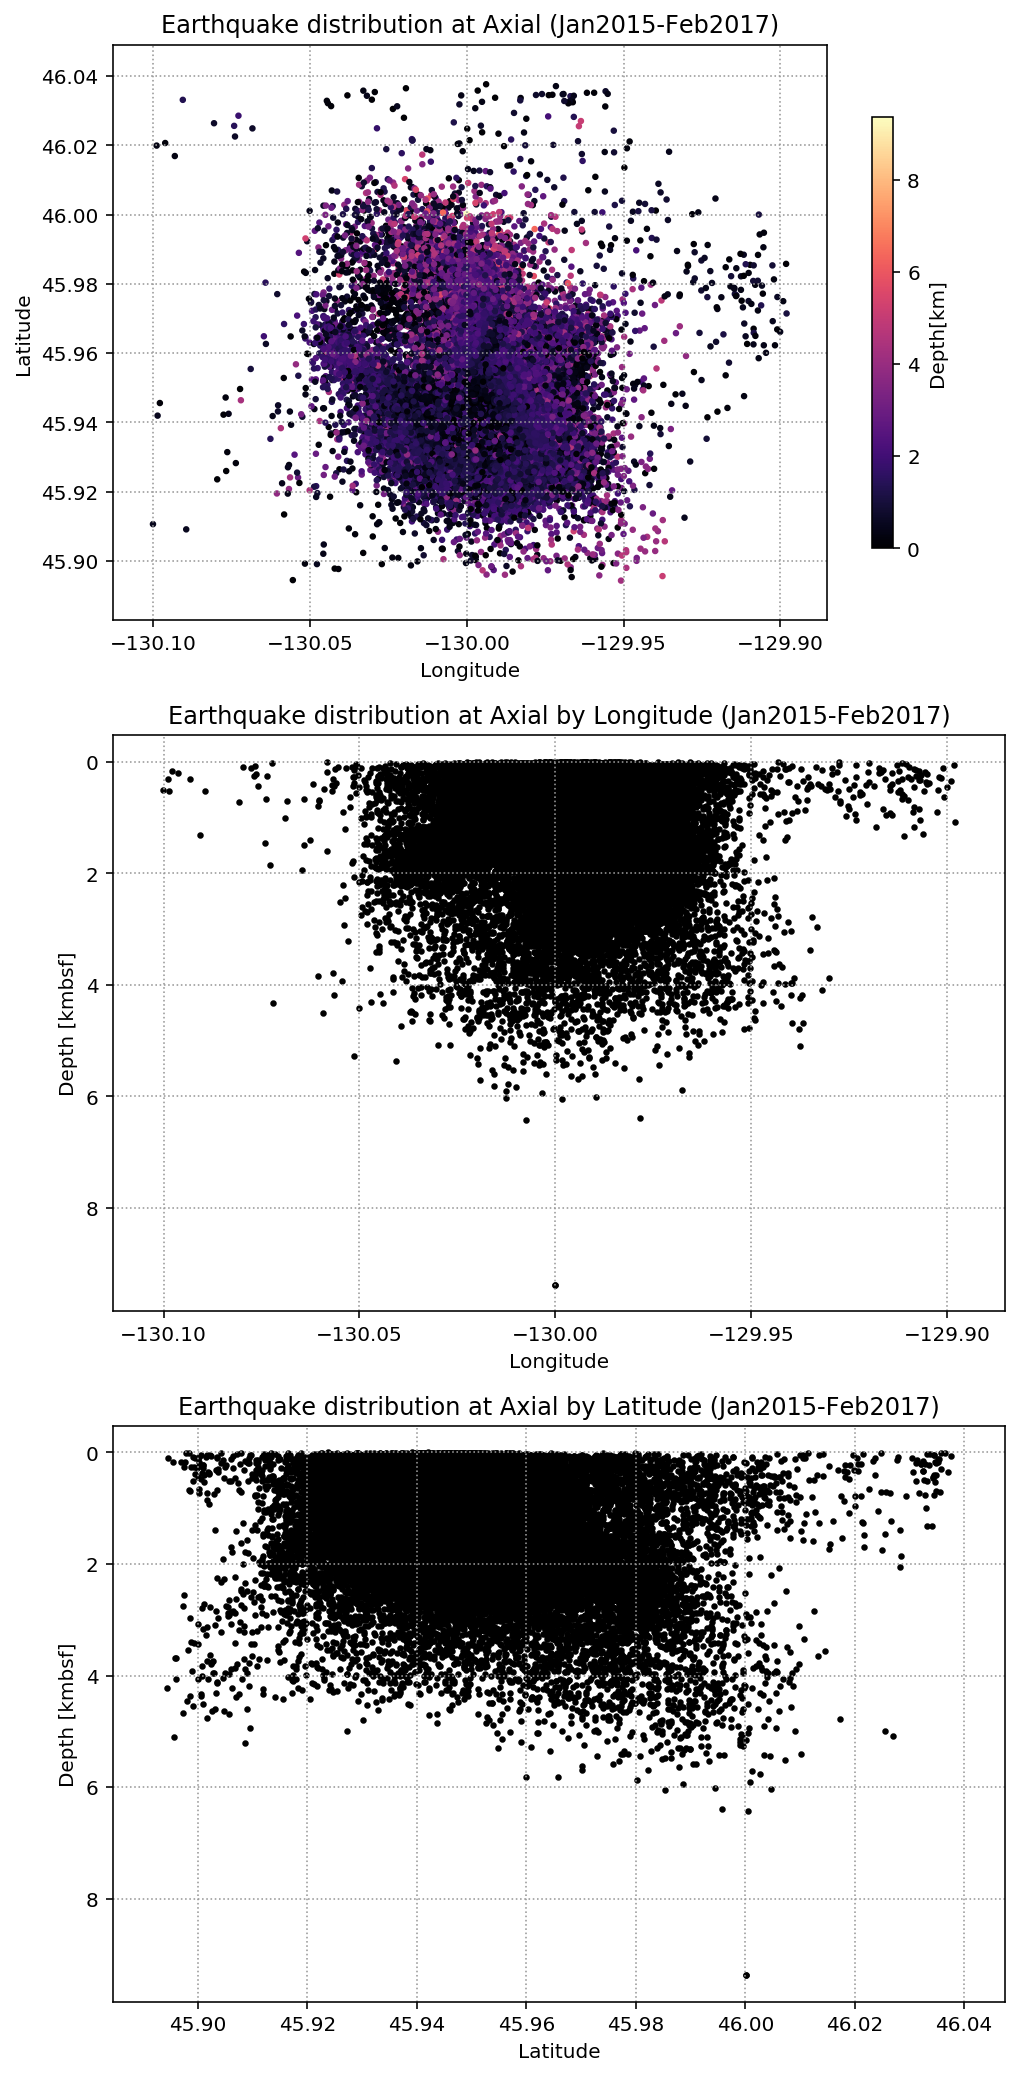

In [19]:
fig, ax = plt.subplots(figsize=(8,18), nrows=3)
splot = ax[0].scatter(eq_catalog.Lon, eq_catalog.Lat, c=eq_catalog.Dep,cmap='magma', s=5)
cb = fig.colorbar(splot,ax=ax[0],shrink=0.75)
cb.set_label('Depth[km]')
ax[0].set_title('Earthquake distribution at Axial (Jan2015-Feb2017)')
ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')
ax[0].grid(which='major',linestyle=':',color='0.6')

ax[1].scatter(eq_catalog.Lon, eq_catalog.Dep,color='k',s=5)
ax[1].set_title('Earthquake distribution at Axial by Longitude (Jan2015-Feb2017)')
ax[1].set_xlabel('Longitude')
ax[1].set_ylabel('Depth [kmbsf]')
ax[1].invert_yaxis()
ax[1].grid(which='major',linestyle=':',color='0.6')

ax[2].scatter(eq_catalog.Lat, eq_catalog.Dep,color='k',s=5)
ax[2].set_title('Earthquake distribution at Axial by Latitude (Jan2015-Feb2017)')
ax[2].set_xlabel('Latitude')
ax[2].set_ylabel('Depth [kmbsf]')
ax[2].invert_yaxis()
ax[2].grid(which='major',linestyle=':',color='0.6')

## Save the Figure
#fig.savefig('EqDistributionall.pdf')

In [20]:
# Axial Seamount 2015 Eruption occurred on April 24, 2015

# Earthquakes from March 1 2015 until day before eruption
before_eq = Mar2May15Eq[Mar2May15Eq.Date < '2015-04-24']

# Eqs day of eruption and about a month after until June 1 2015
duringpost_eq = Mar2May15Eq[Mar2May15Eq.Date >= '2015-04-24']

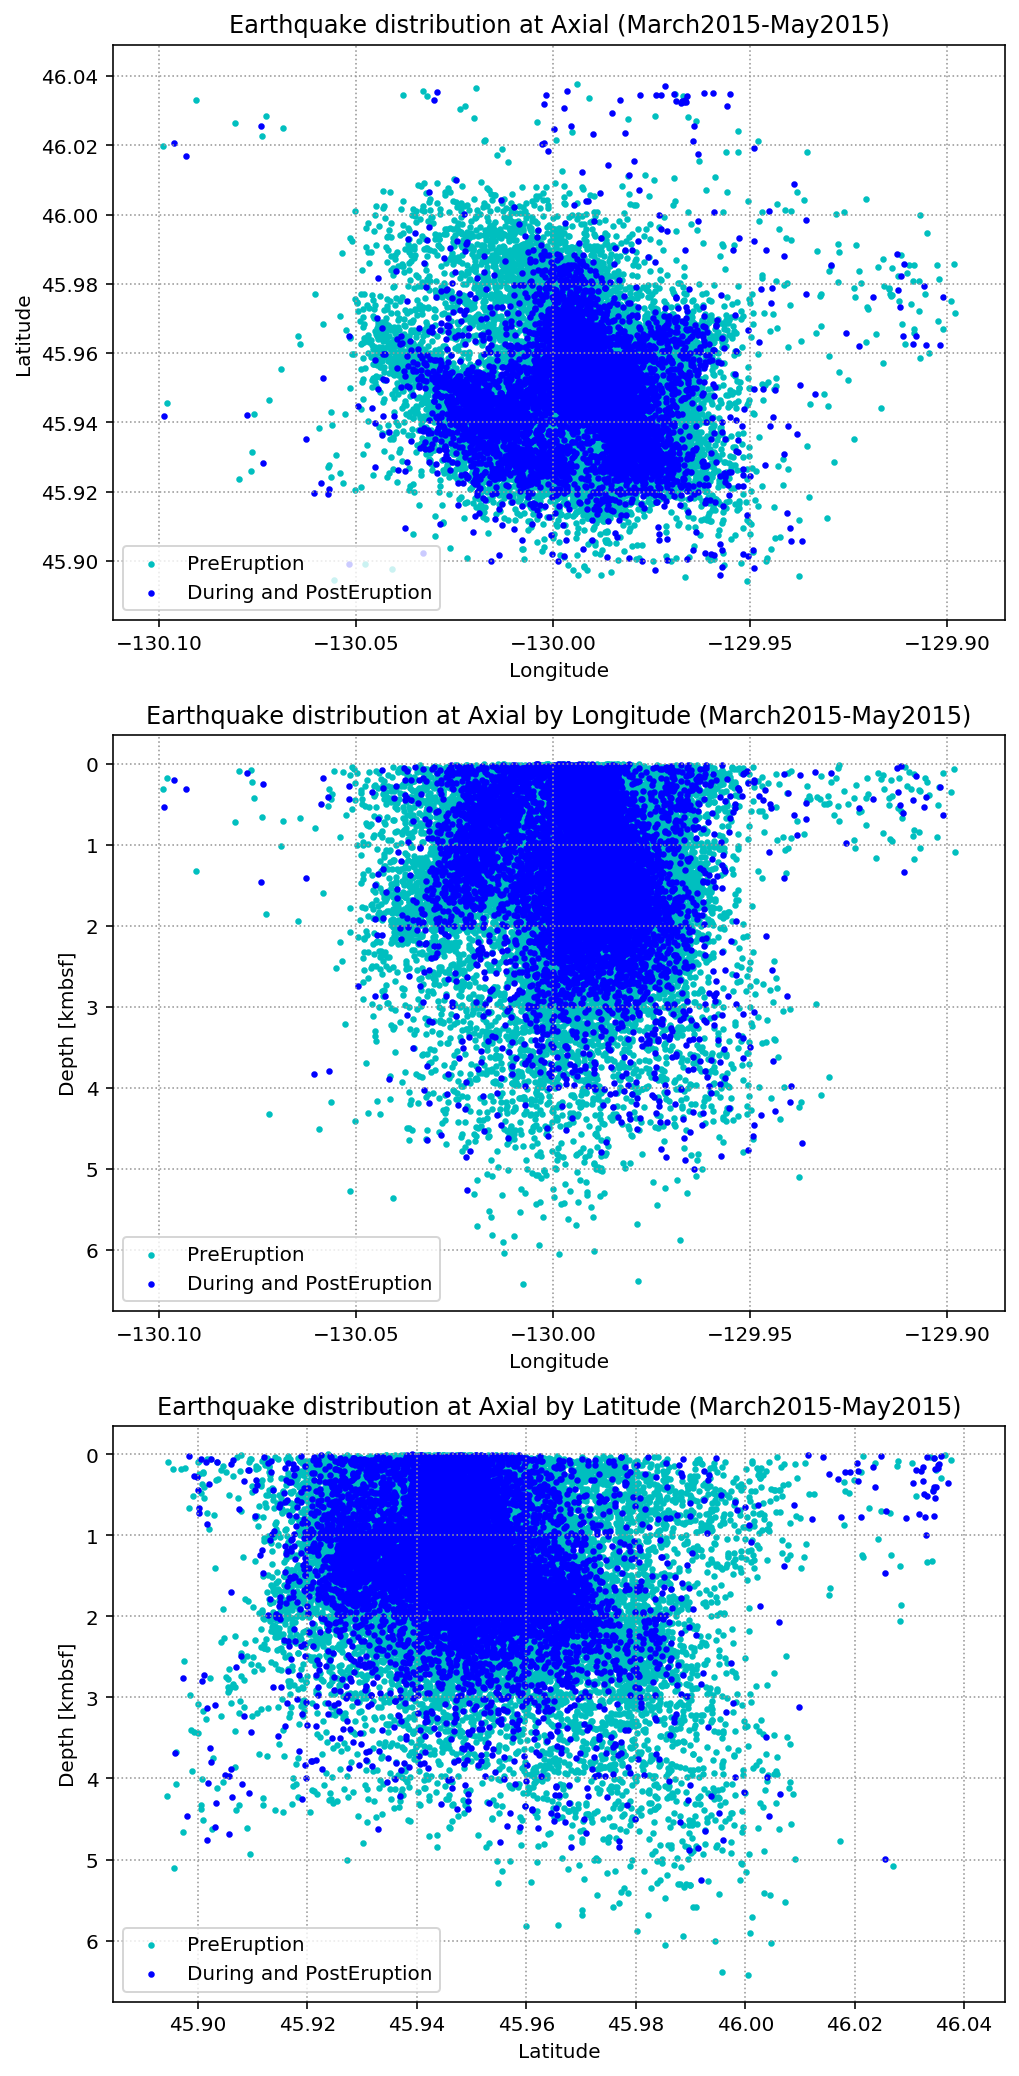

In [21]:
fig, ax = plt.subplots(figsize=(8,18), nrows=3)
a = ax[0].scatter(before_eq.Lon, before_eq.Lat, c='c',s=5)
b = ax[0].scatter(duringpost_eq.Lon, duringpost_eq.Lat, c='b',s=5)
ax[0].set_title('Earthquake distribution at Axial (March2015-May2015)')
ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')
ax[0].grid(which='major',linestyle=':',color='0.6')
ax[0].legend((a, b), ('PreEruption', 'During and PostEruption'))

c = ax[1].scatter(before_eq.Lon, before_eq.Dep,color='c',s=5)
d = ax[1].scatter(duringpost_eq.Lon, duringpost_eq.Dep,color='b',s=5)
ax[1].set_title('Earthquake distribution at Axial by Longitude (March2015-May2015)')
ax[1].set_xlabel('Longitude')
ax[1].set_ylabel('Depth [kmbsf]')
ax[1].invert_yaxis()
ax[1].grid(which='major',linestyle=':',color='0.6')
ax[1].legend((c, d), ('PreEruption', 'During and PostEruption'))

e = ax[2].scatter(before_eq.Lat, before_eq.Dep,color='c',s=5)
f = ax[2].scatter(duringpost_eq.Lat, duringpost_eq.Dep,color='b',s=5)
ax[2].set_title('Earthquake distribution at Axial by Latitude (March2015-May2015)')
ax[2].set_xlabel('Latitude')
ax[2].set_ylabel('Depth [kmbsf]')
ax[2].invert_yaxis()
ax[2].grid(which='major',linestyle=':',color='0.6')
ax[2].legend((e, f), ('PreEruption', 'During and PostEruption'))

## Save Figure
#fig.savefig('EqDistributionMarchMay.pdf')

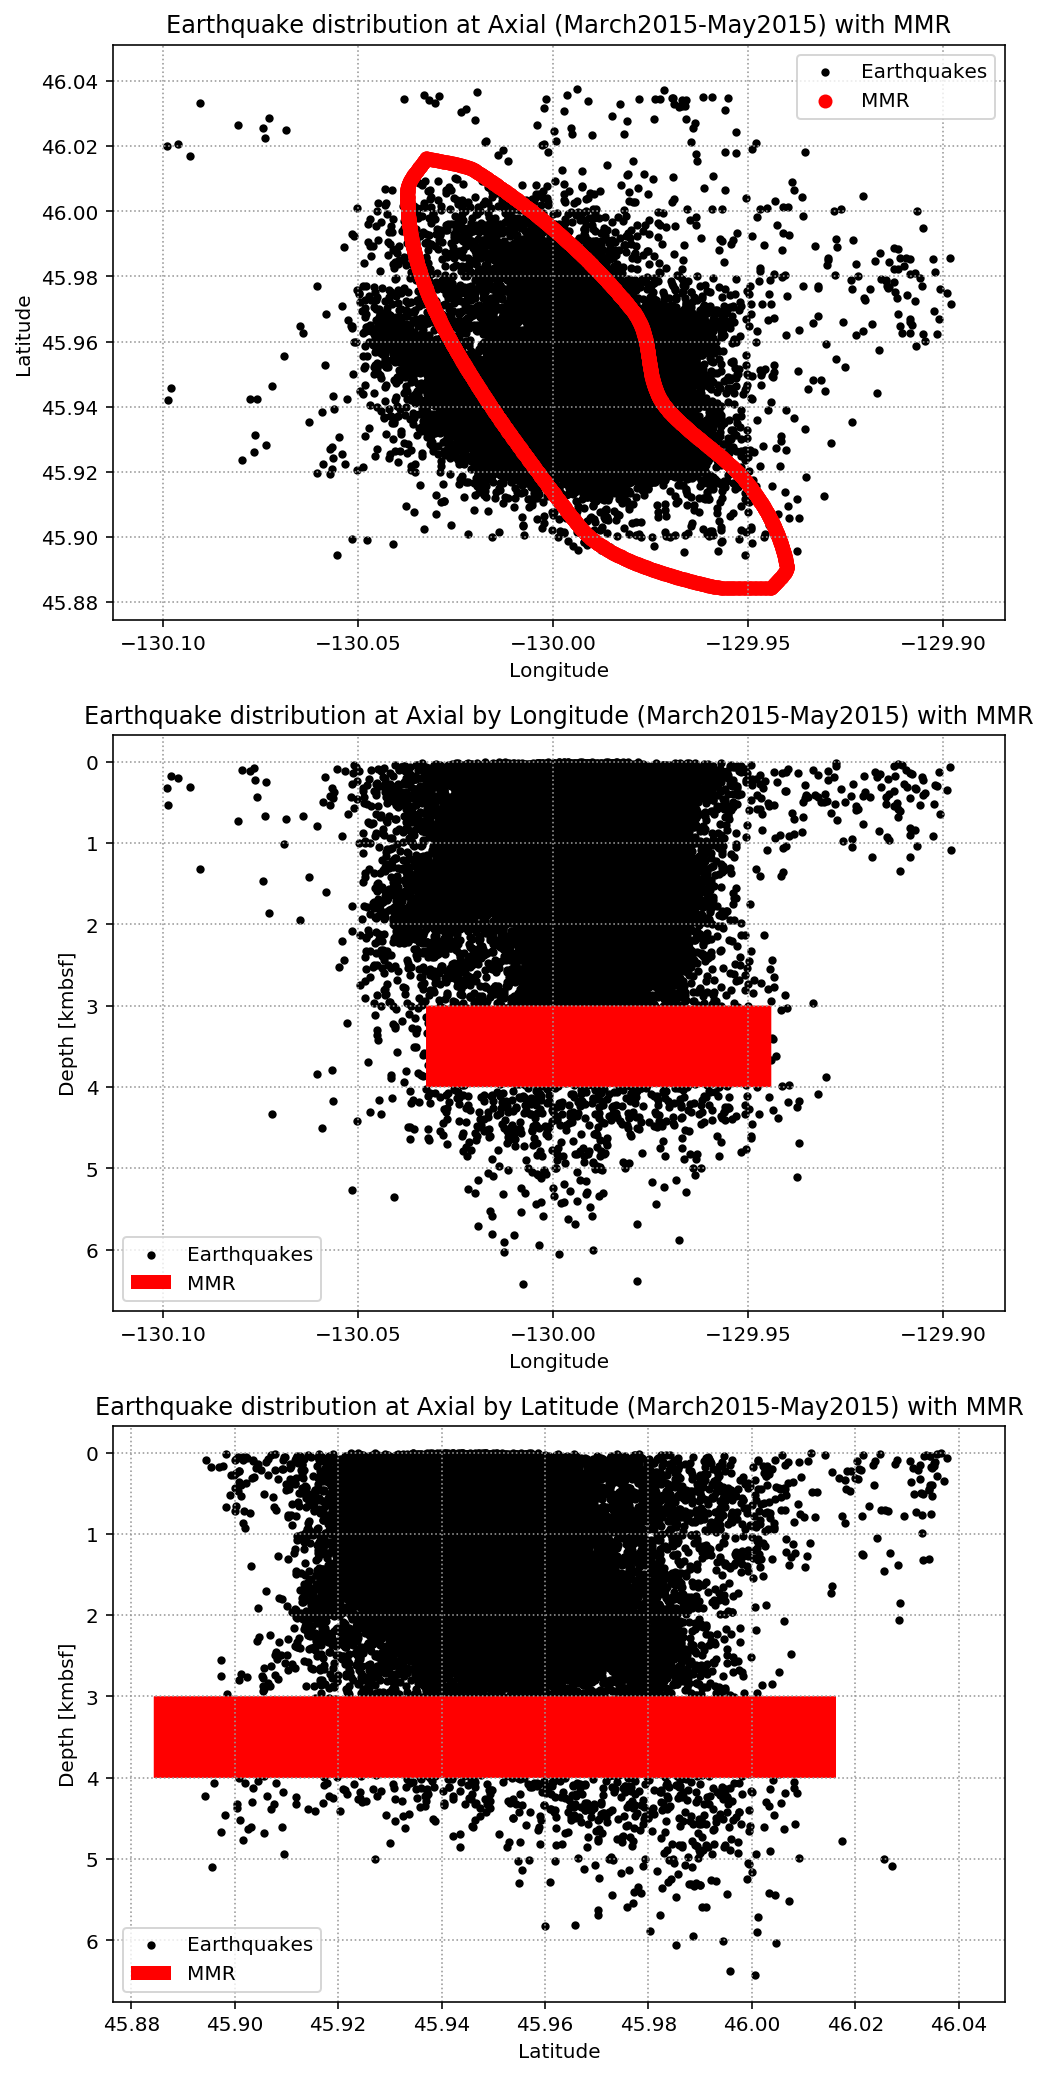

In [22]:
fig, ax = plt.subplots(figsize=(8,18), nrows=3)
a = ax[0].scatter(Mar2May15Eq.Lon, Mar2May15Eq.Lat, c='k',s=10)
b = ax[0].scatter(MMR.Lon, MMR.Lat, c='r')
ax[0].set_title('Earthquake distribution at Axial (March2015-May2015) with MMR')
ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')
ax[0].grid(which='major',linestyle=':',color='0.6')
ax[0].legend((a, b), ('Earthquakes', 'MMR'))

c = ax[1].scatter(Mar2May15Eq.Lon, Mar2May15Eq.Dep,color='k',s=10)
d = ax[1].fill_between(MMR.Lon,3,4,facecolor='r')
ax[1].set_title('Earthquake distribution at Axial by Longitude (March2015-May2015) with MMR')
ax[1].set_xlabel('Longitude')
ax[1].set_ylabel('Depth [kmbsf]')
ax[1].invert_yaxis()
ax[1].grid(which='major',linestyle=':',color='0.6')
ax[1].legend((c, d), ('Earthquakes', 'MMR'))

e = ax[2].scatter(Mar2May15Eq.Lat, Mar2May15Eq.Dep,color='k',s=10)
f = ax[2].fill_between(MMR.Lat,3,4,facecolor='r')
ax[2].set_title('Earthquake distribution at Axial by Latitude (March2015-May2015) with MMR')
ax[2].set_xlabel('Latitude')
ax[2].set_ylabel('Depth [kmbsf]')
ax[2].invert_yaxis()
ax[2].grid(which='major',linestyle=':',color='0.6')
ax[2].legend((e, f), ('Earthquakes', 'MMR'))

## Save Figure
#fig.savefig('EqDistributionwMMR.pdf')

In [23]:
# Selecting only the events that are below the MMR
Deepeq = Mar2May15Eq[Mar2May15Eq.Dep > 4]

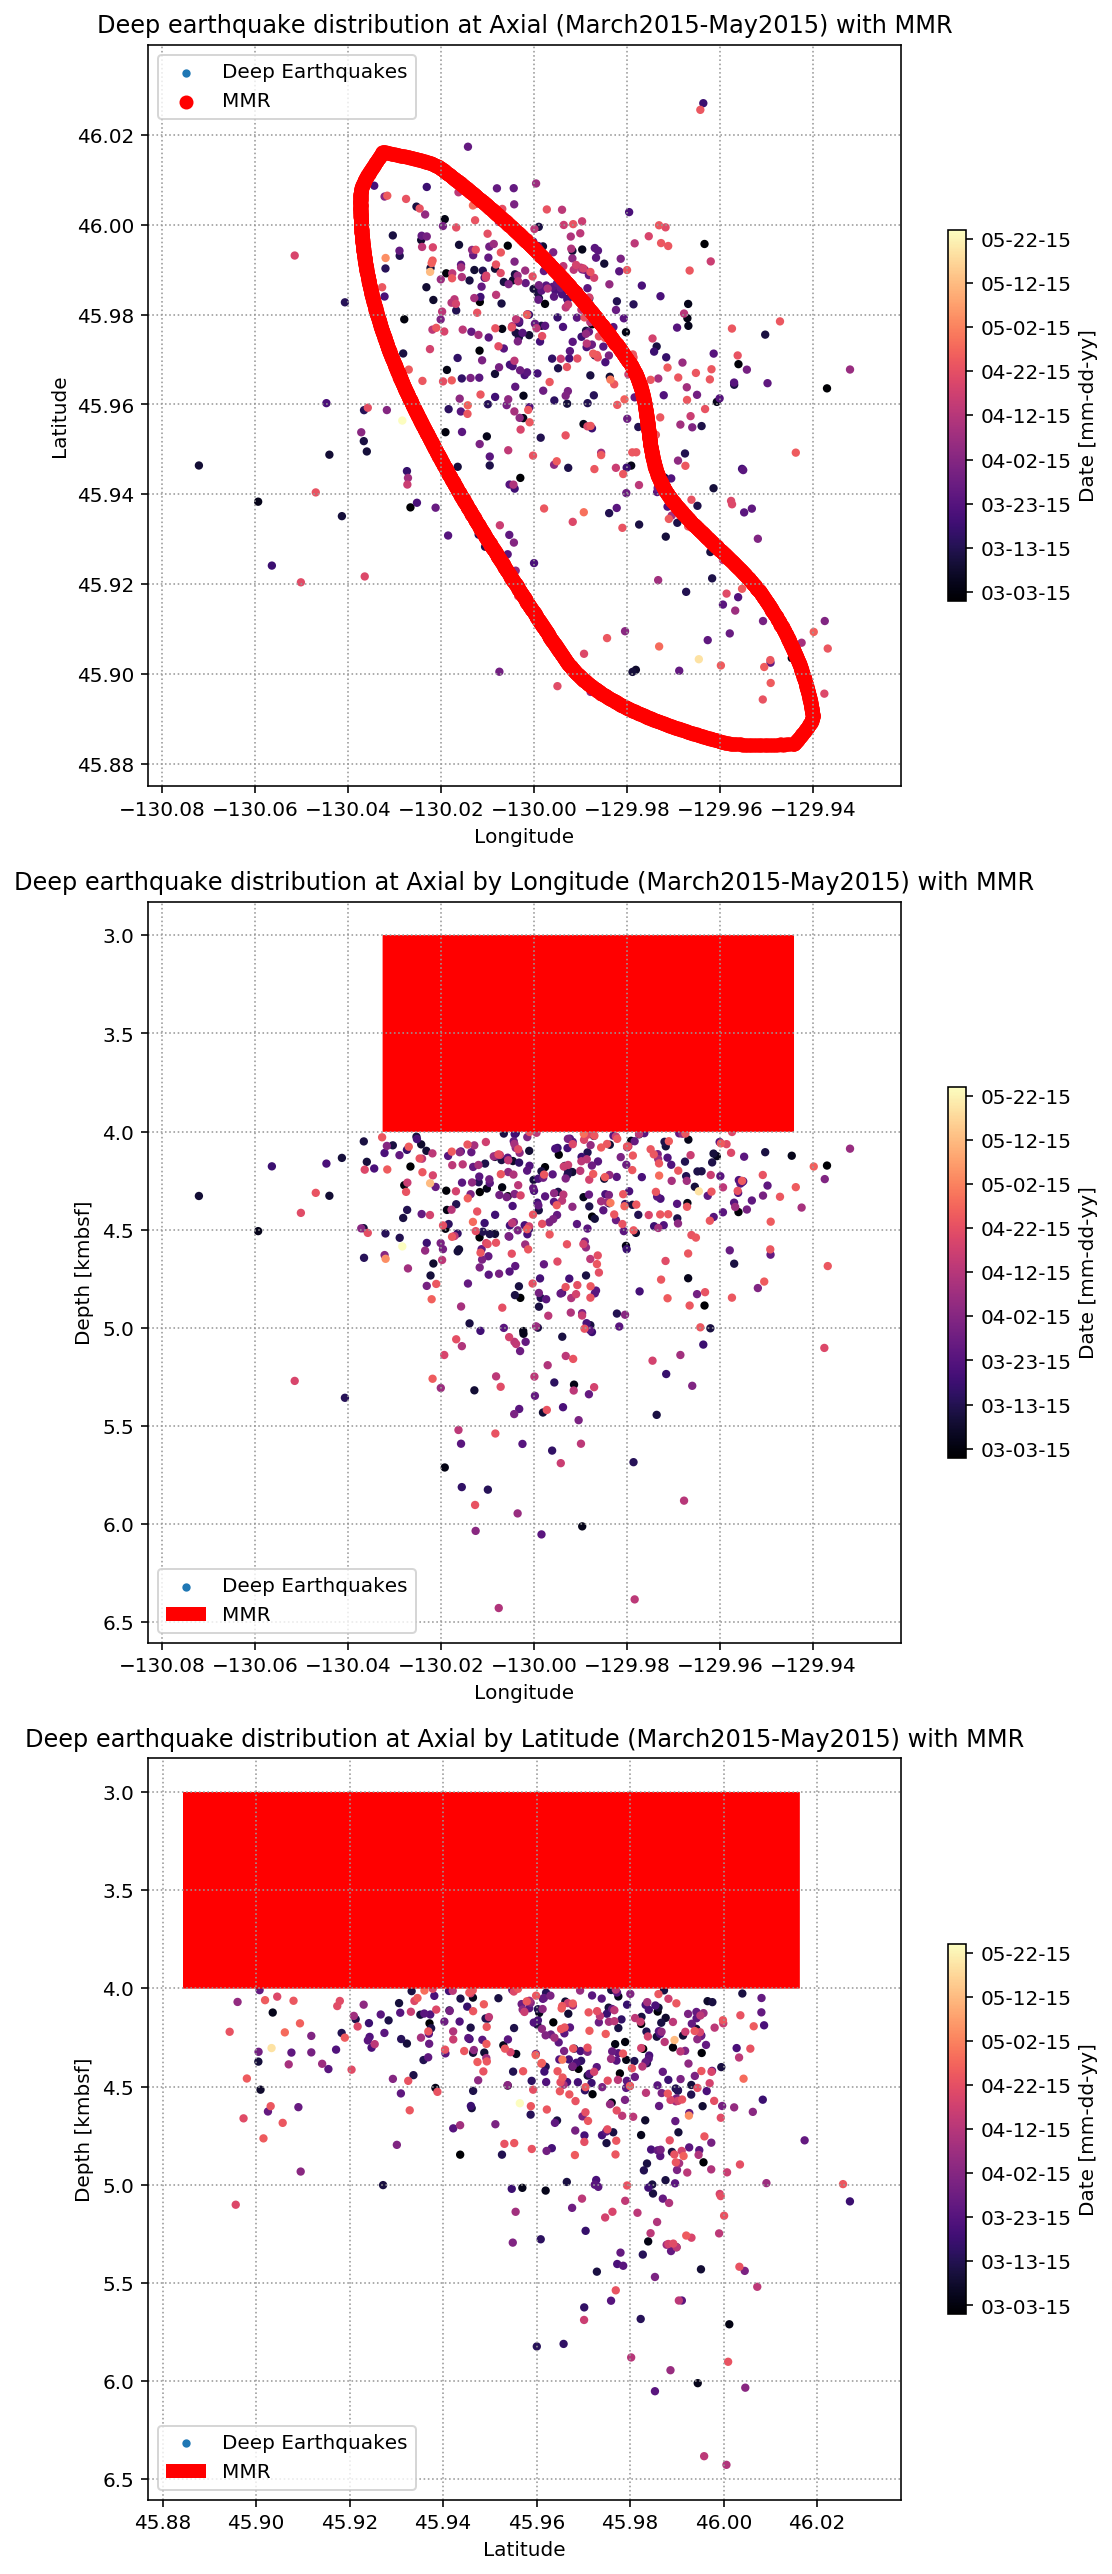

In [24]:
fig, ax = plt.subplots(figsize=(8,18), nrows=3)
splot0 = ax[0].scatter(Deepeq.Lon, Deepeq.Lat, c=[date2num(i.date()) for i in Deepeq.Date], cmap='magma',s=10)
a = ax[0].scatter(MMR.Lon, MMR.Lat, c='r')
cb0 = fig.colorbar(splot0, ax=ax[0], shrink=0.5, format=DateFormatter('%m-%d-%y'))
cb0.set_label('Date [mm-dd-yy]')
ax[0].set_title('Deep earthquake distribution at Axial (March2015-May2015) with MMR')
ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')
ax[0].grid(which='major',linestyle=':',color='0.6')
ax[0].ticklabel_format(useOffset=False)
ax[0].legend((splot0, a), ('Deep Earthquakes', 'MMR'))

splot1 = ax[1].scatter(Deepeq.Lon, Deepeq.Dep, c=[date2num(i.date()) for i in Deepeq.Date], cmap='magma',s=10)
b = ax[1].fill_between(MMR.Lon,3,4,facecolor='r')
cb1 = fig.colorbar(splot1, ax=ax[1], shrink=0.5, format=DateFormatter('%m-%d-%y'))
cb1.set_label('Date [mm-dd-yy]')
ax[1].set_title('Deep earthquake distribution at Axial by Longitude (March2015-May2015) with MMR')
ax[1].set_xlabel('Longitude')
ax[1].set_ylabel('Depth [kmbsf]')
ax[1].invert_yaxis()
ax[1].grid(which='major',linestyle=':',color='0.6')
ax[1].ticklabel_format(useOffset=False)
ax[1].legend((splot1, b), ('Deep Earthquakes', 'MMR'), loc='lower left')

splot2 = ax[2].scatter(Deepeq.Lat, Deepeq.Dep, c=[date2num(i.date()) for i in Deepeq.Date], cmap='magma',s=10)
c = ax[2].fill_between(MMR.Lat,3,4,facecolor='r')
cb2 = fig.colorbar(splot2, ax=ax[2], shrink=0.5, format=DateFormatter('%m-%d-%y'))
cb2.set_label('Date [mm-dd-yy]')
ax[2].set_title('Deep earthquake distribution at Axial by Latitude (March2015-May2015) with MMR')
ax[2].set_xlabel('Latitude')
ax[2].set_ylabel('Depth [kmbsf]')
ax[2].invert_yaxis()
ax[2].grid(which='major',linestyle=':',color='0.6')
ax[2].legend((splot2, c), ('Deep Earthquakes', 'MMR'), loc='lower left')

plt.tight_layout()

## Save Figure
#fig.savefig('DeepEQMMR.pdf')

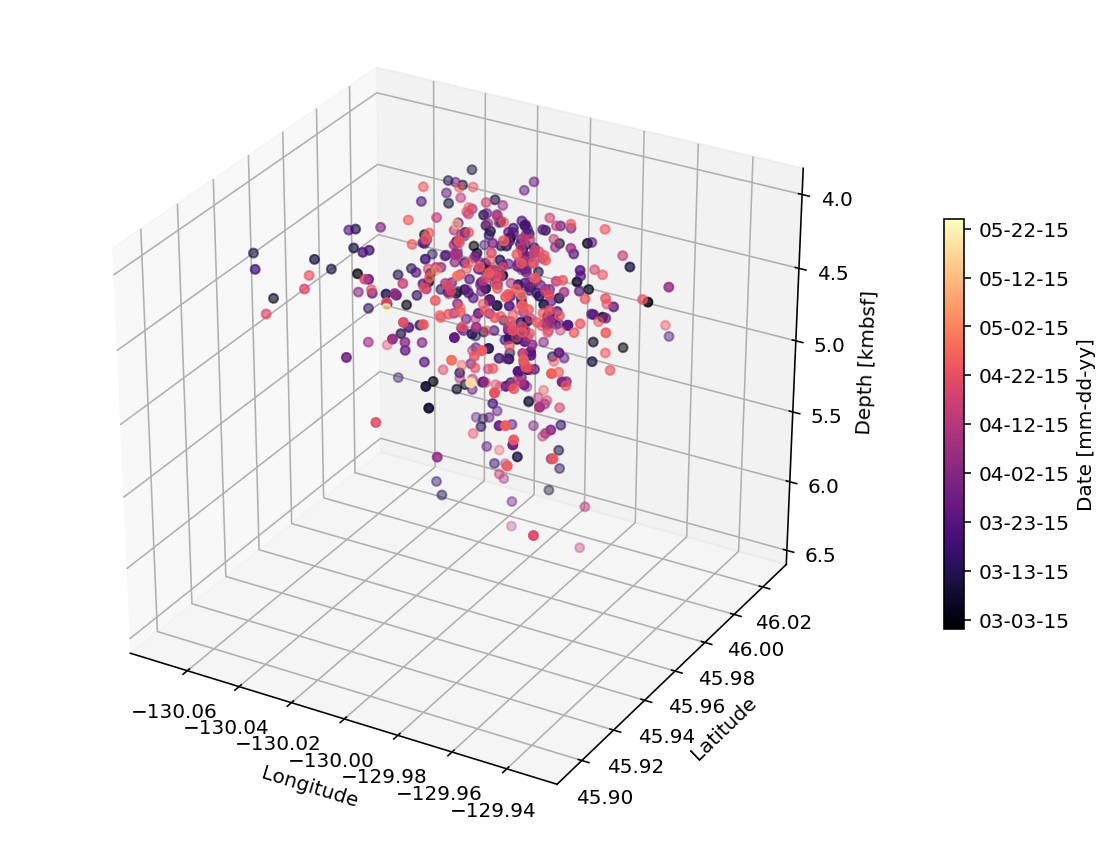

In [25]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')

scat = ax.scatter3D(Deepeq.Lon, Deepeq.Lat, Deepeq.Dep, c=[date2num(i.date()) for i in Deepeq.Date], cmap='magma')
cbar = fig.colorbar(scat, ax=ax, shrink=0.5, format=DateFormatter('%m-%d-%y'))
cbar.set_label('Date [mm-dd-yy]')


ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Depth [kmbsf]')
ax.invert_zaxis()
ax.ticklabel_format(useOffset=False)
plt.tight_layout()

## Save Figure
#fig.savefig('Deepeq3d.pdf')

In [26]:
before_deepeq = before_eq[before_eq.Dep > 4]
duringpost_deepeq = duringpost_eq[duringpost_eq.Dep > 4]

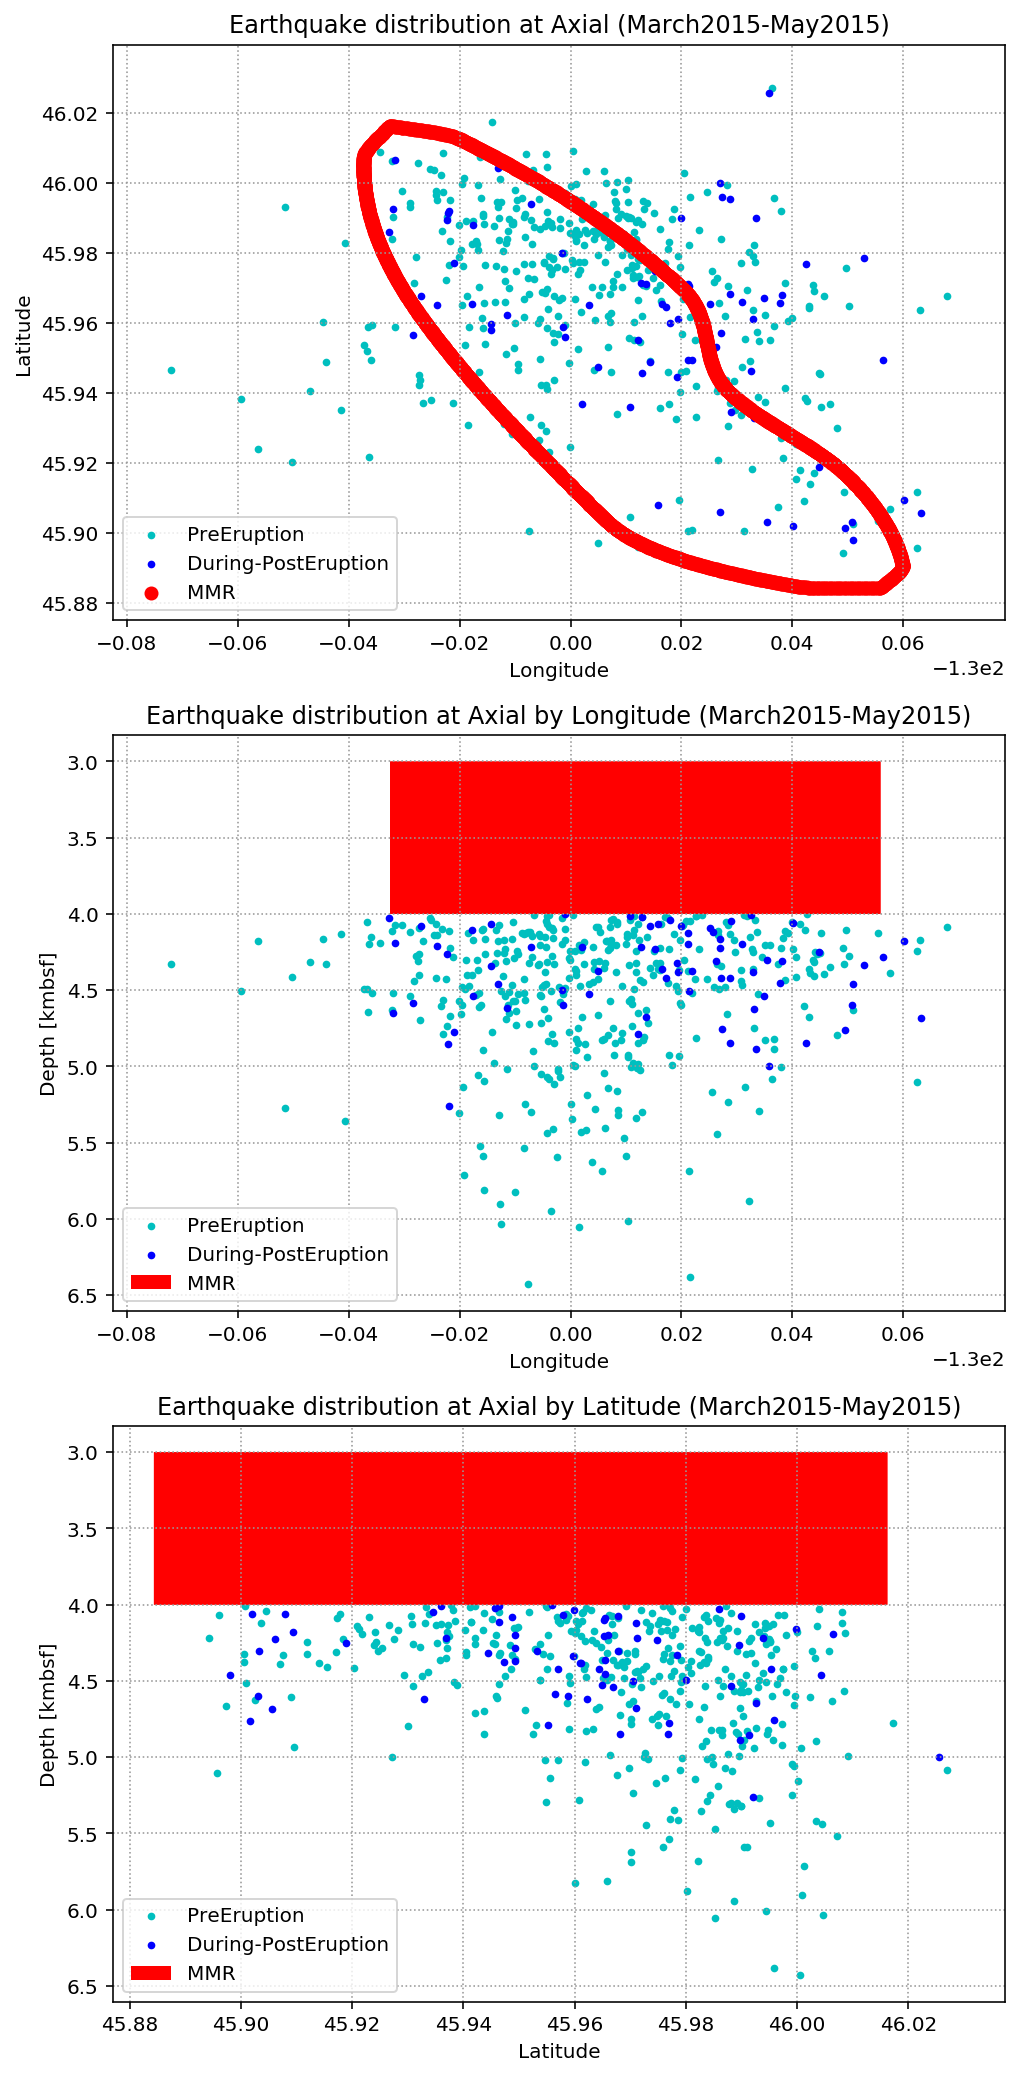

In [27]:
fig, ax = plt.subplots(figsize=(8,18), nrows=3)
a = ax[0].scatter(before_deepeq.Lon, before_deepeq.Lat, c='c', s=8)
b = ax[0].scatter(duringpost_deepeq.Lon, duringpost_deepeq.Lat, c='b', s=8)
c = ax[0].scatter(MMR.Lon, MMR.Lat, c='r')
ax[0].set_title('Earthquake distribution at Axial (March2015-May2015)')
ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')
ax[0].grid(which='major',linestyle=':',color='0.6')
ax[0].legend((a, b, c), ('PreEruption', 'During-PostEruption', 'MMR'))

d = ax[1].scatter(before_deepeq.Lon, before_deepeq.Dep,color='c',s=8)
e = ax[1].scatter(duringpost_deepeq.Lon, duringpost_deepeq.Dep,color='b',s=8)
f = ax[1].fill_between(MMR.Lon,3,4,facecolor='r')
ax[1].set_title('Earthquake distribution at Axial by Longitude (March2015-May2015)')
ax[1].set_xlabel('Longitude')
ax[1].set_ylabel('Depth [kmbsf]')
ax[1].invert_yaxis()
ax[1].grid(which='major',linestyle=':',color='0.6')
ax[1].legend((d, e, f), ('PreEruption', 'During-PostEruption', 'MMR'), loc='lower left')

g = ax[2].scatter(before_deepeq.Lat, before_deepeq.Dep,color='c',s=8)
h = ax[2].scatter(duringpost_deepeq.Lat, duringpost_deepeq.Dep,color='b',s=8)
i = ax[2].fill_between(MMR.Lat,3,4,facecolor='r')
ax[2].set_title('Earthquake distribution at Axial by Latitude (March2015-May2015)')
ax[2].set_xlabel('Latitude')
ax[2].set_ylabel('Depth [kmbsf]')
ax[2].invert_yaxis()
ax[2].grid(which='major',linestyle=':',color='0.6')
ax[2].legend((g, h, i), ('PreEruption', 'During-PostEruption', 'MMR'), loc='lower left')

## Save Figure
#fig.savefig('BeforeafterDeepEQ.pdf')

## Discussion/ Findings

#### S-P and Depth:

Based on the S-P v. Depth plot we can determine what the velocity model should look like in this region. From the plot we can see that velocity should not be the same at all depths. At approximately 3m depth there seems to be a shift in the "slope" for the distribution being a bit steeper, meaning a faster velocity. This 3m depth is also the location where the MMR begins. The presence of a magma reservoir can change the time it takes the seismic waves travel because it has a different composition than the surrounding rocks. 

#### Earthquake Distribution from March-May 2015:

The eruption of Axial Seamount in 2015 occurred on April 24. I took a subsection of the earthquake catalog to look at the distribution of earthquakes the month and half preceeding the eruption and the month proceeding the eruption. From the plots, it seems that the earthquakes that occurred post eruption seems to be more congregated towards the southern end of the region compared to the earthquakes before the eruption. The plots also showed that most of the deeper earthquakes (located towards the northern area of the region) seemed to preceed the eruption (blue). 

#### Deep Earthquake Distribution in Relation to the MMR:

From the plots, there were a number of deep earthquakes that are below the location of the main magma reservoir around the time of the 2015 eruption. The deeper earthquakes seem to be located near the northern parts of the MMR. The deepest of the selected "deep earthquakes" all congregate near 46 degrees N.  These deeper earthquakes all seem to have occurred before the eruption. 